# Context
What is Phishing?

Phishing is a type of cybercrime in which a target or targets are contacted by email, telephone or text message by someone posing as a legitimate institution to lure individuals into providing sensitive data such as personally identifiable information, banking and credit card details, and passwords.

The information is then used to access important accounts of the victims and it mostly results in identity theft and financial loss.

Phishing is one of the most popular cybercrimes among attackers as it is easier to trick someone into clicking a malicious link which seems legitimate than trying to break through a computer’s defence systems.


# Problem Statement

Phishing attacks have been causing havoc for many years. They are increasingly becoming a concern all over the world. 

Being a data science enthusiast, you challenge yourself to solve this problem using the power of machine learning and data science.

# Objective

You are required to develop a machine learning detector that would automatically detect phishing attacks.

# Evaluation Criteria

Submissions are evaluated using Accuracy Score


Source: https://dphi.tech/practice/challenge/41

# Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
# To download the csv file locally
from google.colab import files

In [ ]:
phishing_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Training_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Testing_set_label.csv')


# General data look up

In [ ]:
phishing_data.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [ ]:
phishing_data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
phishing_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,...,7.5,3.750000,0,0,0,0,0,0,143,0.930070,0.069930,0,1,0,0.000000,0,0.0,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,...,10.7,0.000000,2,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,...,10.0,5.666667,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,...,4.0,0.000000,0,0,0,0,0,0,404,0.962871,0.037129,0,0,0,0.133333,0,0.0,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,...,7.0,0.000000,0,0,0,0,0,0,57,0.684211,0.315789,0,3,0,0.000000,0,0.0,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,zero,0,164,1662,312044,0,0,4,legitimate


In [ ]:
phishing_data.status.value_counts()

phishing      5741
legitimate    5740
Name: status, dtype: int64

From the above data following observations are found
No missing values 
No data imbalance

# DATA EDA and Cleaning

Basically data contains three sets of features to determine its legitamacy. They are
1. URL based features-(f0-f56)
2. Content based features-(f57-f80)
3. External based features-(f81-f87)

The url column is used for extracting features f1 till f56 so we can drop this column from both train and test data frame.

In [ ]:
phishing_data.drop(['url'],axis=1,inplace=True)
test_data.drop(['url'],axis=1,inplace=True)

In [ ]:
phishing_data.shape

(11481, 88)

In [ ]:
url_based_features=phishing_data.columns[0:56]
content_based_features=phishing_data.columns[56:80]
external_based_features=phishing_data.columns[80:87]

In [ ]:
url_based_features

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report'],
      

In [ ]:
content_based_features

Index(['nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intRedirection',
       'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
       'login_form', 'external_favicon', 'links_in_tags', 'submit_email',
       'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe', 'popup_window',
       'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
       'domain_in_title', 'domain_with_copyright'],
      dtype='object')

In [ ]:
external_based_features

Index(['whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank'],
      dtype='object')

# Let's analyse each type seperately. Let's start with url-based features

In [ ]:
train_url=phishing_data[url_based_features].copy()

In [ ]:
train_url=pd.concat([train_url,phishing_data['status']],axis=1)

In [ ]:
train_url.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,status
0,46,20,zero,3,zero,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,6,3,2,3,2,12,12,5,5.0,7.5,3.750000,0,0,0,0,0,0,phishing
1,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,10,6,2,2,0,35,35,0,10.7,10.7,0.000000,2,0,0,0,0,0,phishing
2,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,5,5,3,3,3,17,17,9,7.4,10.0,5.666667,0,0,0,0,0,0,phishing
3,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,2,3,3,3,0,5,5,0,4.0,4.0,0.000000,0,0,0,0,0,0,legitimate
4,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,11,11,0,7.0,7.0,0.000000,0,0,0,0,0,0,legitimate


In [ ]:
train_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length_url               11481 non-null  int64  
 1   length_hostname          11481 non-null  int64  
 2   ip                       11481 non-null  object 
 3   nb_dots                  11481 non-null  int64  
 4   nb_hyphens               11481 non-null  object 
 5   nb_at                    11481 non-null  int64  
 6   nb_qm                    11481 non-null  int64  
 7   nb_and                   11481 non-null  int64  
 8   nb_or                    11481 non-null  int64  
 9   nb_eq                    11481 non-null  int64  
 10  nb_underscore            11481 non-null  int64  
 11  nb_tilde                 11481 non-null  int64  
 12  nb_percent               11481 non-null  int64  
 13  nb_slash                 11481 non-null  int64  
 14  nb_star               

In [ ]:
train_url['nb_hyphens'].unique()

array(['zero', '0', '1', '2', '5', '7', '4', '3', 'one', '8', '9', '6',
       '17', '11', '14', '24', '10', '13', '15', '19', '18', '16', '20',
       '26', '12', '32', '23'], dtype=object)

In [ ]:
train_url['ip'].unique()

array(['zero', '0', '1', 'one'], dtype=object)

The columns ip and nb_hyphens has some entries as zeros and ones which has to be replaced to 0 and 1 

In [ ]:
train_url['nb_hyphens']=train_url['nb_hyphens'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x)
train_url['ip']=train_url['ip'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x)

In [ ]:
train_url['ip'].dtype

dtype('O')

In [ ]:
train_url.astype({'nb_hyphens':'int64','ip':'int64'},)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,status
0,46,20,0,3,0,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,6,3,2,3,2,12,12,5,5.000000,7.5,3.750000,0,0,0,0,0,0,phishing
1,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,10,6,2,2,0,35,35,0,10.700000,10.7,0.000000,2,0,0,0,0,0,phishing
2,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,5,5,3,3,3,17,17,9,7.400000,10.0,5.666667,0,0,0,0,0,0,phishing
3,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,2,3,3,3,0,5,5,0,4.000000,4.0,0.000000,0,0,0,0,0,0,legitimate
4,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,11,11,0,7.000000,7.0,0.000000,0,0,0,0,0,0,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11476,44,25,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.181818,0.320000,0,0,0,0,1,3,0,0,0,0,0,0,4,1,4,10,4,11,11,5,7.500000,10.5,4.500000,0,0,0,0,0,0,phishing
11477,43,14,0,3,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.139535,0.000000,0,0,0,0,0,3,0,0,0,0,2,0,6,0,2,2,3,8,8,6,4.666667,5.0,4.500000,0,0,0,0,0,0,legitimate
11478,39,22,0,3,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,4,3,2,3,2,14,14,4,5.750000,8.5,3.000000,0,0,0,0,0,0,phishing
11479,114,11,0,3,6,0,0,0,0,0,0,0,0,8,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,1,1,0,0,1,0,15,4,2,3,2,11,3,11,5.933333,3.0,6.384615,0,0,0,0,0,0,legitimate


In [ ]:
train_url['ip'].value_counts()

0    9784
1    1697
Name: ip, dtype: int64

In [ ]:
test_data['nb_hyphens']=test_data['nb_hyphens'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x).astype('int64')
test_data['ip']=test_data['ip'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x).astype('int64')

In [ ]:
phishing_data['nb_hyphens']=phishing_data['nb_hyphens'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x).astype('int64')
phishing_data['ip']=phishing_data['ip'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x).astype('int64')

In [ ]:
category_col_url=[val for val in train_url.columns[:-1] if train_url[val].nunique()<10]

In [ ]:
non_category_col_url=[val for val in train_url.columns[:-1] if train_url[val].nunique()>=10]
non_category_col_url

['length_url',
 'length_hostname',
 'nb_dots',
 'nb_hyphens',
 'nb_and',
 'nb_eq',
 'nb_underscore',
 'nb_percent',
 'nb_slash',
 'nb_semicolumn',
 'ratio_digits_url',
 'ratio_digits_host',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path']

In [ ]:
len(category_col_url)

33

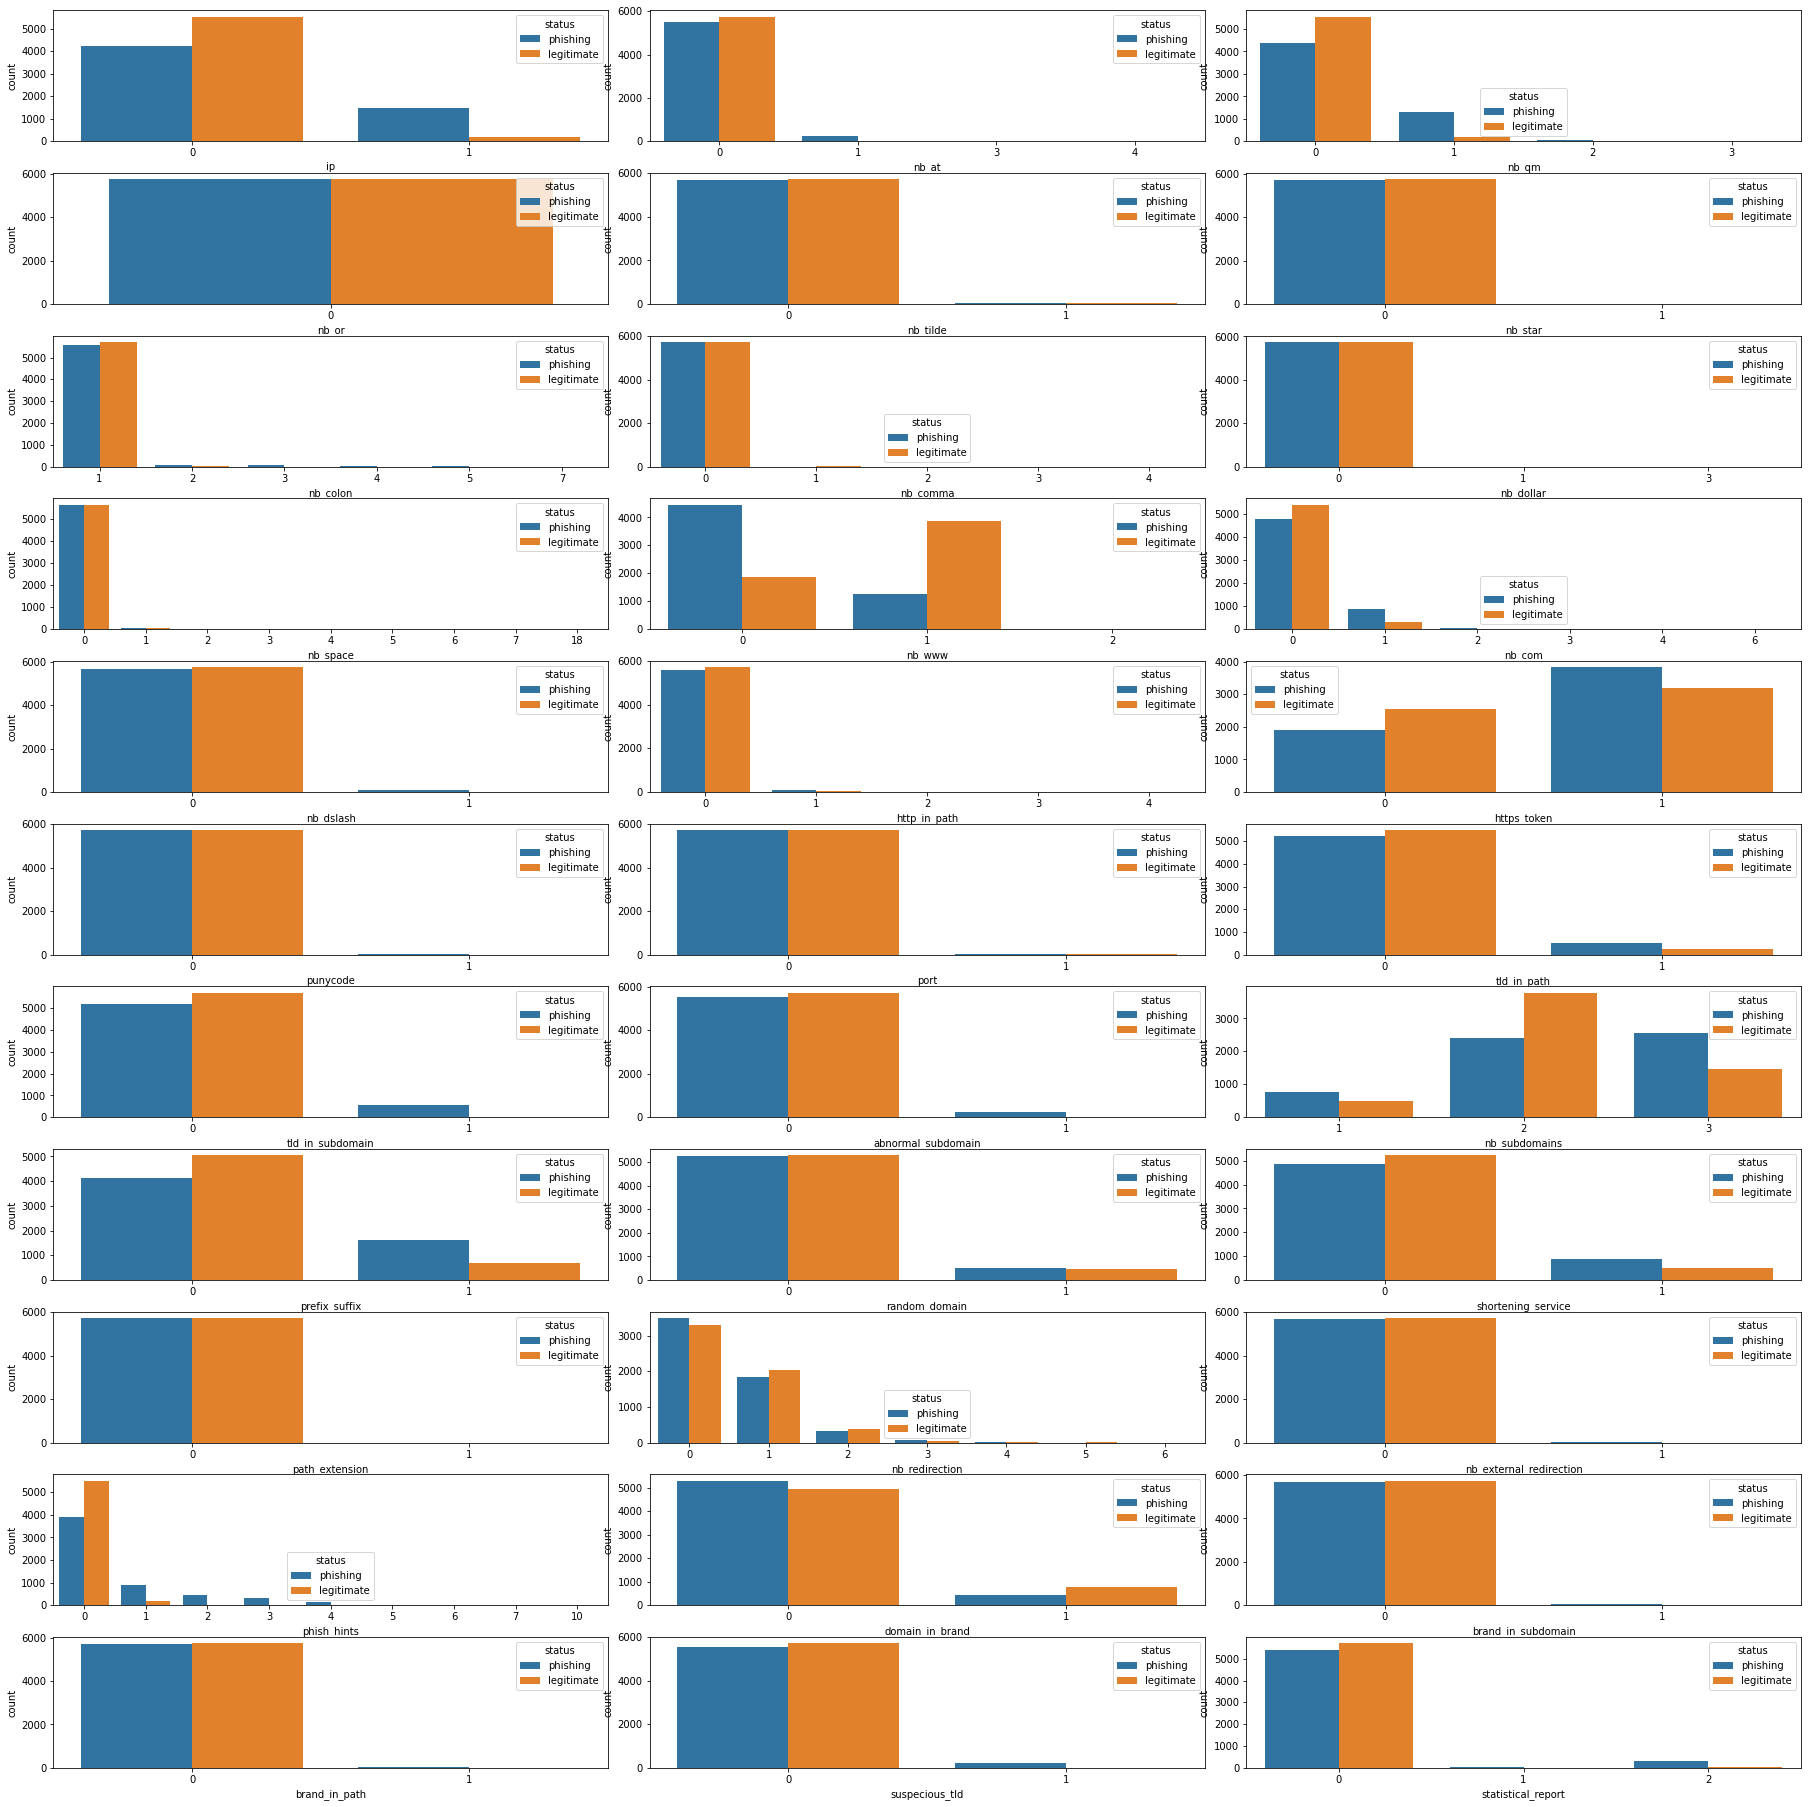

In [ ]:
f, axes = plt.subplots(11, 3,figsize=(25,25))
f.tight_layout()
for i,val in enumerate(category_col_url):
  sns.countplot(x=val,data=train_url,hue='status',ax=axes[i//3][i%3])
    


    

1. IP feature - when it's zero legitimate address are more compared to phising, similarly when its one phishing address is more compared to legitimate address.

  Presence of IP address in the url can play a significant role in identifying whether the address is phising or legitimate.


2.  nb-www- 0(No www in the link ) (More phishing  compared to legitimate) , 1(More legitimate compared to phising websites). It's obvious as more phising website does not contain www in their weblink.

3. https tag in the link- 0 -less-phising 1-more phising compared to legitimate sites. This is surprising result as I expect https websites usually are secure.

4. nb_redirection- phising activity increases with increase in redirection count

5. Some features like phish hints, statistical report , suspicious id shares almost equal count of phising and legitimate cases with count=0 but as we have atlease 1 count, it contributes to phising site.

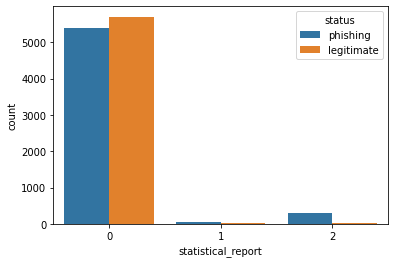

In [ ]:
sns.countplot(x='statistical_report',data=train_url,hue='status')

In [ ]:
non_category_col_url

['length_url',
 'length_hostname',
 'nb_dots',
 'nb_hyphens',
 'nb_and',
 'nb_eq',
 'nb_underscore',
 'nb_percent',
 'nb_slash',
 'nb_semicolumn',
 'ratio_digits_url',
 'ratio_digits_host',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path']

In [ ]:
train_url_temp=train_url.copy()

In [ ]:
train_url_temp=train_url_temp.astype({'nb_hyphens':'int64','ip':'int64'})

In [ ]:
train_url_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length_url               11481 non-null  int64  
 1   length_hostname          11481 non-null  int64  
 2   ip                       11481 non-null  int64  
 3   nb_dots                  11481 non-null  int64  
 4   nb_hyphens               11481 non-null  int64  
 5   nb_at                    11481 non-null  int64  
 6   nb_qm                    11481 non-null  int64  
 7   nb_and                   11481 non-null  int64  
 8   nb_or                    11481 non-null  int64  
 9   nb_eq                    11481 non-null  int64  
 10  nb_underscore            11481 non-null  int64  
 11  nb_tilde                 11481 non-null  int64  
 12  nb_percent               11481 non-null  int64  
 13  nb_slash                 11481 non-null  int64  
 14  nb_star               

In [ ]:
for val in non_category_col_url:
  if 'nb_' not in val:
      train_url_temp[val+'_bins']=pd.qcut(train_url_temp[val], q=5,duplicates='drop')
  else:
    train_url_temp.astype({val:'int64'})
    train_url_temp[val+'_bins']=pd.qcut(train_url_temp[val], q=5,duplicates='drop')

In [ ]:
train_url.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,status
0,46,20,0,3,0,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,6,3,2,3,2,12,12,5,5.0,7.5,3.750000,0,0,0,0,0,0,phishing
1,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,10,6,2,2,0,35,35,0,10.7,10.7,0.000000,2,0,0,0,0,0,phishing
2,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,5,5,3,3,3,17,17,9,7.4,10.0,5.666667,0,0,0,0,0,0,phishing
3,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,2,3,3,3,0,5,5,0,4.0,4.0,0.000000,0,0,0,0,0,0,legitimate
4,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,11,11,0,7.0,7.0,0.000000,0,0,0,0,0,0,legitimate


In [ ]:
len(train_url_temp.columns[58:])

22

# Extra 22 dcolumns gets created

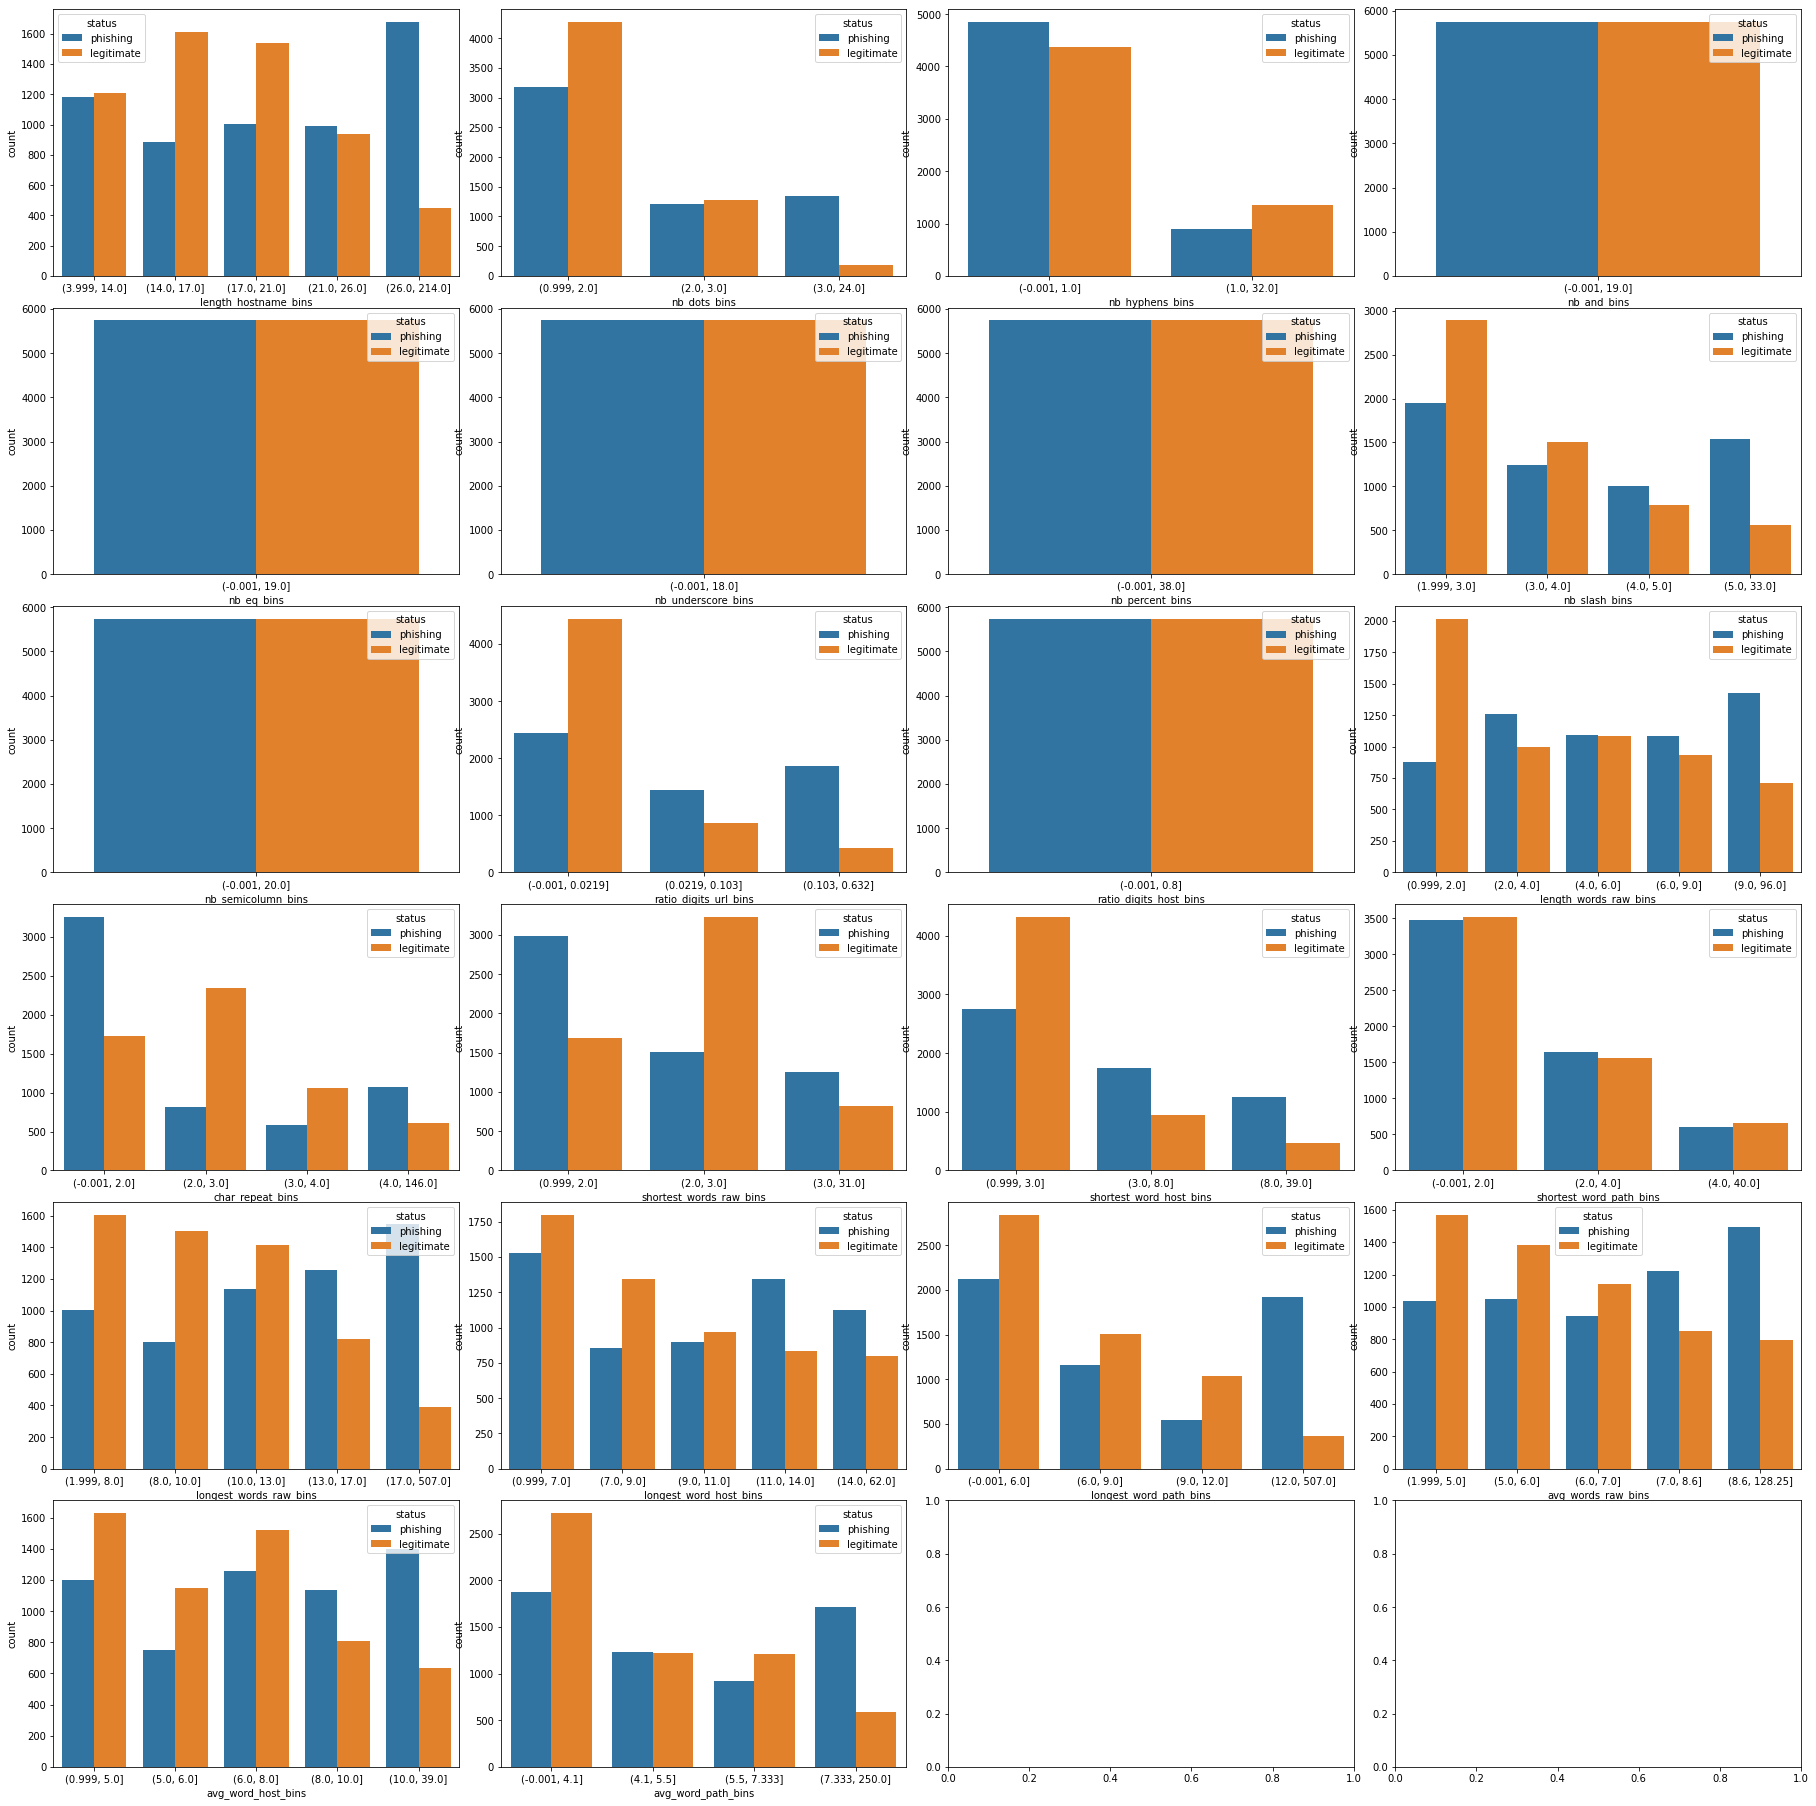

In [ ]:
f, axes = plt.subplots(6, 4,figsize=(25,25))
f.tight_layout()
for i,val in enumerate(train_url_temp.columns[58:]):
  sns.countplot(x=val,data=train_url_temp,hue='status',ax=axes[i//4][i%4])
    

# Observation from above graph

if length_hostname is greater than 21 then there is a large possibility that it's a phising site

if nb_dots >3 , nb_slash > 4, rtio_digits_url > 0.0219, longest_words_raw>13, longest_words_path>12, avg_word_host > 10, avg_word_path >7 then there is large possibility that it's a phishing site.

I believe
The features nb_semicolon,nb_eq_bins,nb_underscore,nb_percent,nb_ratio_digits_hosts doesnot contribute to the classification much as the phising and legitimate contribution are almost equal

# Let's plot the heatmap for coorelation

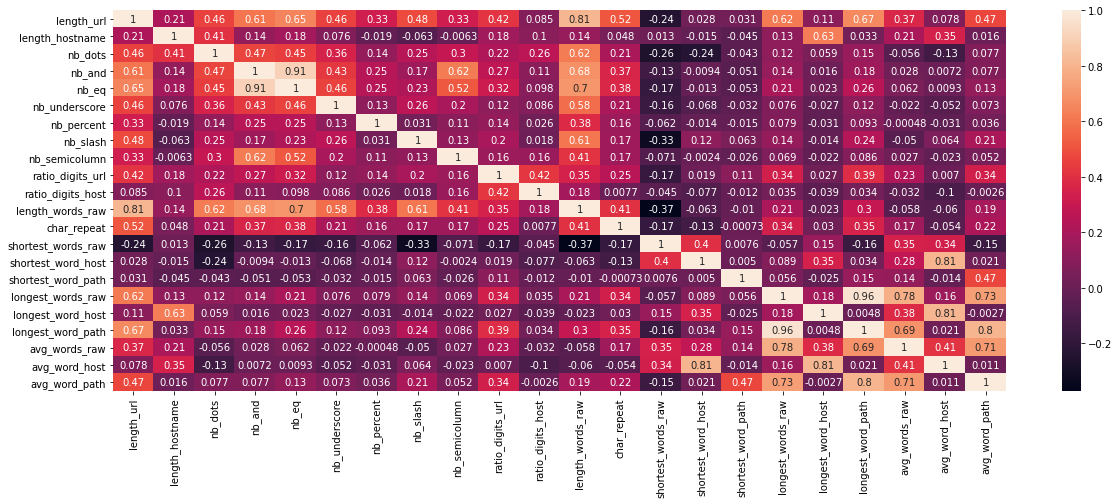

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(train_url[non_category_col_url].corr(), annot=True)

# It looks clumsy when plotting heatmap, let's create a function to get the column values belongs to each category which is correlated more than 70% with any other column in the dataset

In [ ]:
def coorelation(df,threshold=0.7):
  correlation_col=set()
  correlation_matrix=df.corr()
  for i in range(len(correlation_matrix.columns)):
    for j in range(i):
      if abs(correlation_matrix.iloc[i,j])>threshold:
        correlation_col.add(correlation_matrix.columns[i])
        print('The correlation between {} and {} is {}'.format(correlation_matrix.columns[i],correlation_matrix.columns[j],correlation_matrix.iloc[i,j]))
  return correlation_col

In [ ]:
correlated_values_url=coorelation(train_url[:-1])
     

The correlation between nb_eq and nb_qm is 0.7301533831999037
The correlation between nb_eq and nb_and is 0.9072709206710164
The correlation between abnormal_subdomain and ratio_digits_host is 0.7051119698378695
The correlation between length_words_raw and length_url is 0.8118586542360814
The correlation between length_words_raw and nb_eq is 0.703069538407606
The correlation between longest_word_path and longest_words_raw is 0.9640694647596793
The correlation between avg_words_raw and longest_words_raw is 0.7832201182521266
The correlation between avg_word_host and shortest_word_host is 0.8068655160402528
The correlation between avg_word_host and longest_word_host is 0.8099643437145896
The correlation between avg_word_path and longest_words_raw is 0.7317264403204852
The correlation between avg_word_path and longest_word_path is 0.8035034872701253
The correlation between avg_word_path and avg_words_raw is 0.7147586347496208


nb_eq is highly coorelated with nb_qm , nb_and , length_words_raw

abnormal_subdomain and ratio_digits_host are positively coorelated

avg_words_raw and longest_words_raw are highly coorelated

avg_words_host, shortest_word_host, longest_word_host are highly coorelated

avg_words_path correlated with longest_words_host, longest_word_path, avg_words_raw



In [ ]:
correlated_values_url

{'abnormal_subdomain',
 'avg_word_host',
 'avg_word_path',
 'avg_words_raw',
 'length_words_raw',
 'longest_word_path',
 'nb_eq'}

# we can remove this features in the later stage if we require while model building


# External based features

In [ ]:
train_external=phishing_data[external_based_features].copy()


In [ ]:
train_external=pd.concat([train_external,phishing_data['status']],axis=1)

In [ ]:
train_external.head()

,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,0,627,6678,78526,0,0,5,phishing
1,0,300,65,0,0,1,0,phishing
2,0,119,1707,0,0,1,0,phishing
3,0,130,1331,0,0,0,0,legitimate
4,0,164,1662,312044,0,0,4,legitimate


In [ ]:
category_col_ext=[val for val in train_external.columns[:-1] if train_external[val].nunique()<10]
non_category_col_ext=[val for val in train_external.columns[:-1] if train_external[val].nunique()>=10]

In [ ]:
category_col_ext

['whois_registered_domain', 'dns_record', 'google_index']

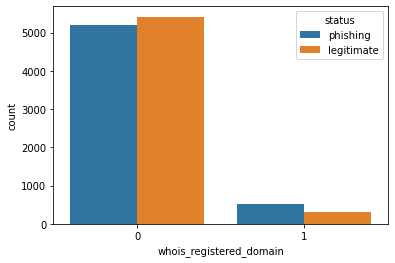

In [ ]:
sns.countplot(x='whois_registered_domain',data=train_external,hue='status')

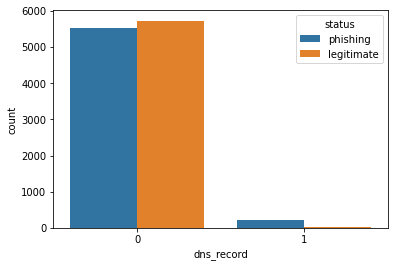

In [ ]:
sns.countplot(x='dns_record',data=train_external,hue='status')

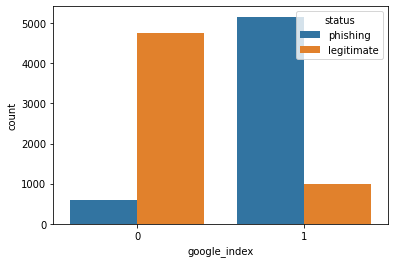

In [ ]:
sns.countplot(x='google_index',data=train_external,hue='status')

# Key insights

When the google index is 0, number of legitimate sites are more whereas the opposite holds true when google index is 1.
When we have dns_record value as 1, mostly it corresponds to phishing site

In [ ]:
non_category_col_ext

['domain_registration_length', 'domain_age', 'web_traffic', 'page_rank']

In [ ]:
train_external_temp=train_external.copy()

In [ ]:
for val in non_category_col_ext:
  train_external_temp[val+'_bins']=pd.qcut(train_external_temp[val], q=5,duplicates='drop')
 
    

In [ ]:
train_external.shape

(11481, 8)

In [ ]:
train_external_temp.columns[8:]

Index(['domain_registration_length_bins', 'domain_age_bins',
       'web_traffic_bins', 'page_rank_bins'],
      dtype='object')

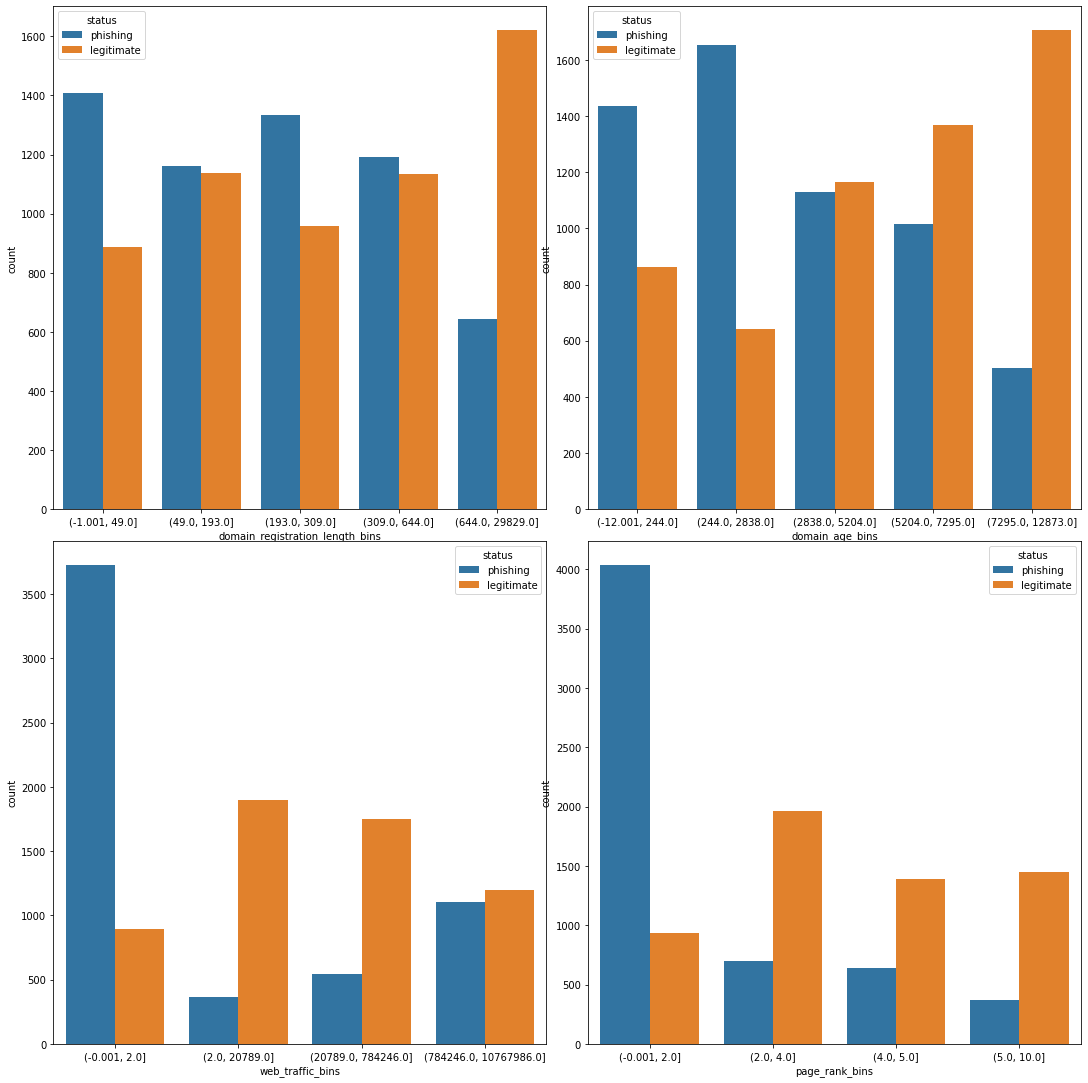

In [ ]:
f, axes = plt.subplots(2, 2,figsize=(15,15))
f.tight_layout()
for i,val in enumerate(train_external_temp.columns[8:]):
  sns.countplot(x=val,data=train_external_temp,hue='status',ax=axes[i//2][i%2])
    

When domain_age is high then it's more of a legitimate site as phishing site will be usually reported and blocked when it's identified hence the domain age is a important attribute for classifying whether a site is legitimate or not.

When the web_traffic of the site visited is less than 2.0 , then it's more of a phishing site as the visitors will be less for phising site

Page rank corresponds to site popularity will be very low for phishing site hence we can see high count for phishing site for rank less than 2.0 and less count for range between 5.0 and 10.0

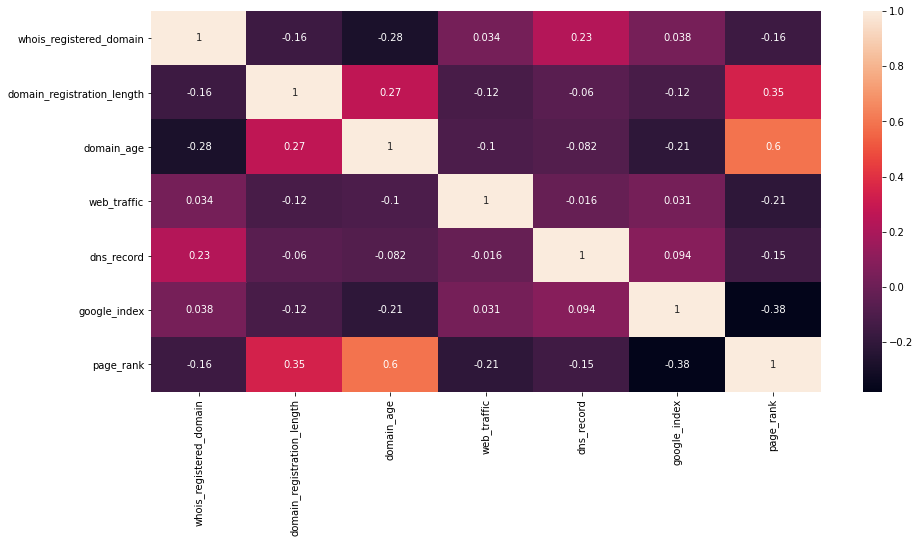

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(train_external.corr(), annot=True)

The external features are not correlated with each other much as I can see the highest correlated features are domain_age and page_rank having 60% correlation.

# Content based features

In [ ]:
train_content=phishing_data[content_based_features].copy()

In [ ]:
train_content=pd.concat([train_content,phishing_data['status']],axis=1)

In [ ]:
train_content.head()

,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,status
0,143,0.930070,0.069930,0,1,0,0.000000,0,0.0,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,one,phishing
1,0,0.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,phishing
2,3,1.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,phishing
3,404,0.962871,0.037129,0,0,0,0.133333,0,0.0,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,one,legitimate
4,57,0.684211,0.315789,0,3,0,0.000000,0,0.0,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,zero,legitimate


In [ ]:
category_col_content=[val for val in train_content.columns[:-1] if train_content[val].nunique()<10]
non_category_col_content=[val for val in train_content.columns[:-1] if train_content[val].nunique()>=10]

In [ ]:
category_col_content

['ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'login_form',
 'external_favicon',
 'submit_email',
 'sfh',
 'iframe',
 'popup_window',
 'onmouseover',
 'right_clic',
 'empty_title',
 'domain_in_title',
 'domain_with_copyright']

In [ ]:
phishing_data['domain_with_copyright'].unique()

array(['one', 'zero', 'One', 'Zero'], dtype=object)

In [ ]:
test_data['domain_with_copyright'].unique()

array(['one', 'zero', 'Zero', 'One'], dtype=object)

In [ ]:
phishing_data['domain_with_copyright']=phishing_data['domain_with_copyright'].apply(lambda x: '0' if x=='Zero' else '1' if x=='One'  else x)
test_data['domain_with_copyright']=test_data['domain_with_copyright'].apply(lambda x: '0' if x=='Zero' else '1' if x=='One' else x)

In [ ]:
phishing_data['domain_with_copyright']=phishing_data['domain_with_copyright'].apply(lambda x: '0' if x=='zero' else '1' if x=='one'  else x)
test_data['domain_with_copyright']=test_data['domain_with_copyright'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x)

In [ ]:
phishing_data=phishing_data.astype({'domain_with_copyright':'int64'})
test_data=test_data.astype({'domain_with_copyright':'int64'})

In [ ]:
phishing_data['domain_with_copyright'].unique()

array([1, 0])

In [ ]:
train_content['domain_with_copyright']=train_content['domain_with_copyright'].apply(lambda x: '0' if x=='Zero' else '1' if x=='One' else x)

In [ ]:
train_content['domain_with_copyright']=train_content['domain_with_copyright'].apply(lambda x: '0' if x=='zero' else '1' if x=='one' else x)

In [ ]:
train_content=train_content.astype({'domain_with_copyright':'int64'})

In [ ]:
train_content['domain_with_copyright'].unique()

array([1, 0])

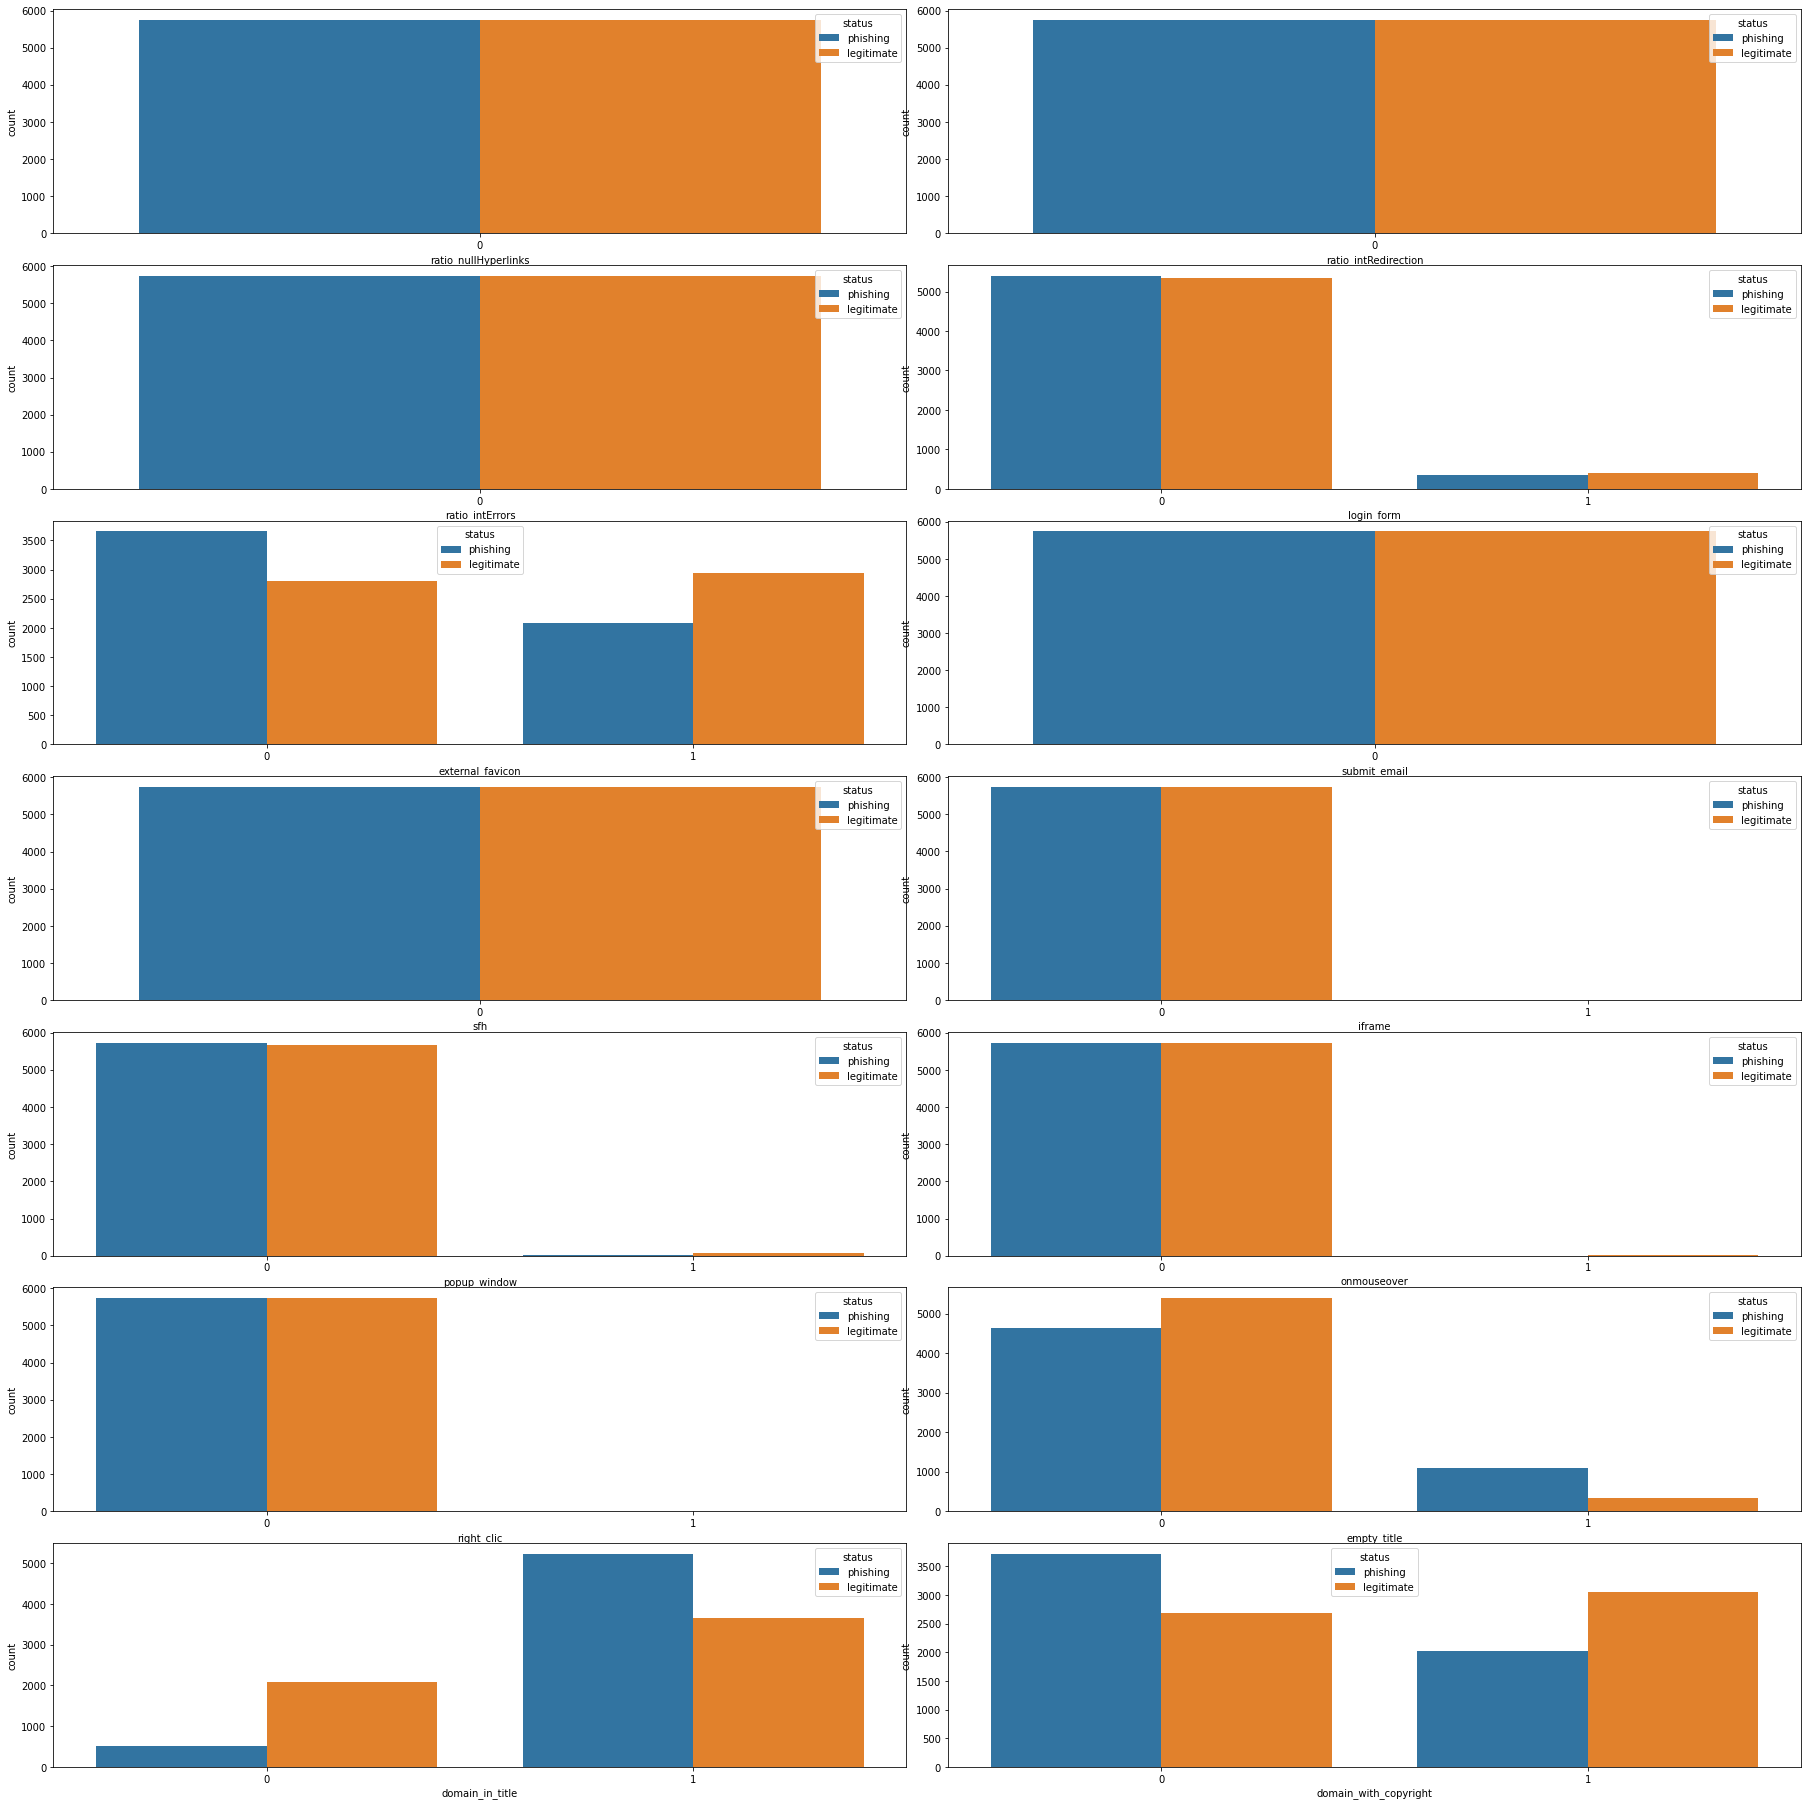

In [ ]:
f, axes = plt.subplots(7, 2,figsize=(25,25))
f.tight_layout()
for i,val in enumerate(category_col_content):
  sns.countplot(x=val,data=train_content,hue='status',ax=axes[i//2][i%2])
    

Most of the categorical columns in  content category seems to be not useful in model building as they contribute equally for both phishing and legitimate cases

columns like domain_title, domain_with_copyright, empty_title provide variances which can be exploited while building the model

In [ ]:
train_content_temp=train_content.copy()

In [ ]:
for val in non_category_col_content:
  train_content_temp[val+'_bins']=pd.qcut(train_content_temp[val], q=5,duplicates='drop')

In [ ]:
train_content.shape

(11481, 25)

In [ ]:
train_content_temp.shape

(11481, 35)

In [ ]:
train_content_temp.columns[25:]

Index(['nb_hyperlinks_bins', 'ratio_intHyperlinks_bins',
       'ratio_extHyperlinks_bins', 'nb_extCSS_bins',
       'ratio_extRedirection_bins', 'ratio_extErrors_bins',
       'links_in_tags_bins', 'ratio_intMedia_bins', 'ratio_extMedia_bins',
       'safe_anchor_bins'],
      dtype='object')

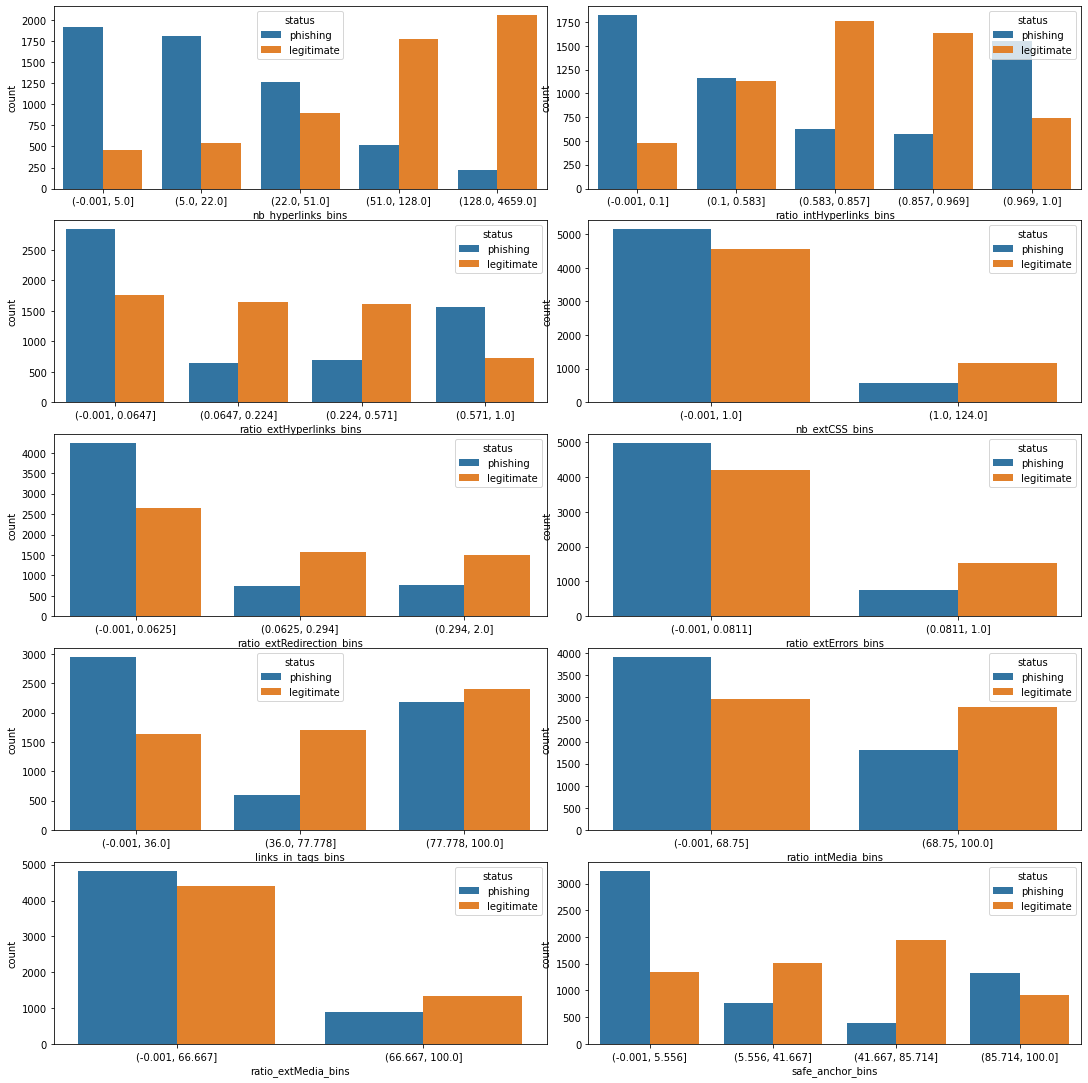

In [ ]:
f, axes = plt.subplots(5, 2,figsize=(15,15))
f.tight_layout()
for i,val in enumerate(train_content_temp.columns[25:]):
  sns.countplot(x=val,data=train_content_temp,hue='status',ax=axes[i//2][i%2])

# key insights

Number of safe anchor between 5 and 86 have more legitimate compared to phising sites

if nb_hyperlinks is high, then it's probably a factor for suspecting as phishing site

ratio extredirection and ext_error ratio are positively coorelated with phishing activity

In [ ]:
correlated_values_content=coorelation(train_content)

The correlation between links_in_tags and ratio_intHyperlinks is 0.7997977308198058


In [ ]:
correlated_values_content

{'links_in_tags'}

# We just have links_in_tags column which is correlated with ratio_inthyperlinks which we can remove while model building if removed

# Model building

In [ ]:
correlated_values_url

{'abnormal_subdomain',
 'avg_word_host',
 'avg_word_path',
 'avg_words_raw',
 'length_words_raw',
 'longest_word_path',
 'nb_eq'}

In [ ]:
content_based_features

Index(['nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intRedirection',
       'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
       'login_form', 'external_favicon', 'links_in_tags', 'submit_email',
       'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe', 'popup_window',
       'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
       'domain_in_title', 'domain_with_copyright'],
      dtype='object')

In [ ]:
content_based_features

Index(['nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intRedirection',
       'ratio_extRedirection', 'ratio_intErrors', 'ratio_extErrors',
       'login_form', 'external_favicon', 'links_in_tags', 'submit_email',
       'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe', 'popup_window',
       'safe_anchor', 'onmouseover', 'right_clic', 'empty_title',
       'domain_in_title', 'domain_with_copyright'],
      dtype='object')

# I am not planning to use all the content_based_features as most of them are not varying to both the classes. We can create a rf classifier and select features from top 10 features

In [ ]:
training_data_content=phishing_data[content_based_features].copy()
training_data_content=pd.concat([training_data_content,phishing_data['status']],axis=1)

In [ ]:
training_data_content['status']=training_data_content['status'].apply(lambda x: 0 if x=='phishing' else 1).astype('int64')

In [ ]:
test_data_content=test_data[content_based_features].copy()


In [ ]:
train_set_content, test_set_content = train_test_split(training_data_content, test_size=0.20, random_state=42)

X_train_set_content = train_set_content.drop(['status'], axis=1) #Dropping both 'shares', the predicted variable and 'url', a text variable
y_train_set_content = train_set_content['status']

X_test_set_content = test_set_content.drop(['status'], axis=1)
y_test_set_content = test_set_content['status']

In [ ]:
forest_classifier_content=RandomForestClassifier(random_state=300,class_weight={0:2,1:1},max_depth=40,n_estimators=300)

In [ ]:
forest_classifier_content.fit(X_train_set_content,y_train_set_content)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 2, 1: 1},
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=300,
                       verbose=0, warm_start=False)

# Let's create a dataframe and store the feature importances for visualization

In [ ]:
df_feature_importance_content = pd.DataFrame(forest_classifier_content.feature_importances_, index=X_train_set_content.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance_content

,feature importance
nb_hyperlinks,0.280633
ratio_extHyperlinks,0.126282
ratio_intHyperlinks,0.104971
safe_anchor,0.088493
links_in_tags,0.079076
ratio_extRedirection,0.064966
domain_in_title,0.051129
domain_with_copyright,0.044713
ratio_extErrors,0.039529
ratio_intMedia,0.032206


In [ ]:
# training_data_model_1['status']=training_data_model_1['status'].apply(lambda x: 0 if x=='phishing' else 1).astype('int64')

# From the above features we can take top 10 features and add it to the dataset for finding the final model.

After trial and error method, I found the features
domain_with_copyright, domain_with_title, nb_hyperlinks, safe_anchor is useful for getting high accuracy. 

In [ ]:
training_data_model_1=phishing_data.drop(correlated_values_url,axis=1)
training_data_model_1=training_data_model_1.drop(content_based_features,axis=1)

In [ ]:
training_data_model_1=pd.concat([training_data_model_1,phishing_data[['domain_with_copyright','domain_in_title','nb_hyperlinks','safe_anchor']]],axis=1)

In [ ]:

#training_data_model_1=pd.concat([training_data_model_1,phishing_data[['domain_in_title','nb_hyperlinks','safe_anchor']]],axis=1)

In [ ]:
#training_data_model_1=pd.concat([training_data_model_1,phishing_data[['nb_hyperlinks']]],axis=1)

In [ ]:
#training_data_model_1=pd.concat([training_data_model_1,phishing_data[df_feature_importance.index[:5]]],axis=1)

In [ ]:
test_data_model_1=test_data.drop(correlated_values_url,axis=1)


In [ ]:
test_data_model_1=test_data_model_1.drop(content_based_features,axis=1)

In [ ]:
#test_data_model_1=pd.concat([test_data_model_1,test_data[df_feature_importance.index[:5]]],axis=1)

In [ ]:
test_data_model_1=pd.concat([test_data_model_1,test_data[['domain_with_copyright','domain_in_title','nb_hyperlinks','safe_anchor']]],axis=1)

In [ ]:
#test_data_model_1=pd.concat([test_data_model_1,test_data[['domain_in_title','nb_hyperlinks','safe_anchor']]],axis=1)

In [ ]:
#test_data_model_1=pd.concat([test_data_model_1,test_data[['nb_hyperlinks']]],axis=1)

In [ ]:
training_data_model_1['status'].value_counts()

phishing      5741
legitimate    5740
Name: status, dtype: int64

In [ ]:
training_data_model_1['status']=training_data_model_1['status'].apply(lambda x: 0 if x=='phishing' else 1).astype('int64')

In [ ]:
training_data_model_1['status'].value_counts()

0    5741
1    5740
Name: status, dtype: int64

In [ ]:
# training_data_model_1.describe()

In [ ]:
# check_domain_registration_length=training_data_model_1.loc[training_data_model_1['domain_registration_length']<0.0].reset_index(drop=True)

In [ ]:
# check_domain_registration_length

In [ ]:
#check_domain_age=training_data_model_1.loc[training_data_model_1['domain_age']<0.0].reset_index(drop=True)

In [ ]:
# training_data_model_1['domain_age']=training_data_model_1['domain_age'].apply(lambda x:abs(x))

In [ ]:
# training_data_model_1.loc[training_data_model_1['domain_age']==0]

In [ ]:
# test_data_model_1['domain_age']=test_data_model_1['domain_age'].apply(lambda x:abs(x))

In [ ]:
# training_data_model_1['domain_age'].describe()

In [ ]:
# sns.countplot(x='domain_age',data=check_domain_age,hue='status')

In [ ]:
# sns.countplot(x='domain_registration_length',data=check_domain_registration_length,hue='status')

In [ ]:
# test_data.describe()

In [ ]:
# training_data_model_1.drop(['nb_or'],axis=1,inplace=True)

In [ ]:
# test_data_model_1.drop(['nb_or'],axis=1,inplace=True)

In [ ]:
train_set, test_set = train_test_split(training_data_model_1, test_size=0.20, random_state=42)

X_train_set = train_set.drop(['status'], axis=1)
y_train_set = train_set['status']

X_test_set = test_set.drop(['status'], axis=1)
y_test_set = test_set['status']

# The parameters mentioned inside RandomForest classifier are obtained using GridsearchCV. You can find the code after conclusion.

In [ ]:
forest_classifier = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 2, 1: 1}, criterion='gini',
                       max_depth=40, max_features=3, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
forest_classifier.fit(X_train_set, y_train_set)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 2, 1: 1}, criterion='gini',
                       max_depth=40, max_features=3, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
status_predictions = forest_classifier.predict(X_test_set)
forest_acc = accuracy_score(y_test_set, status_predictions)
forest_f1 = f1_score(y_test_set, status_predictions)
print('The accuracy and F1 score of the model are {},{}'.format(forest_acc,forest_f1))

The accuracy and F1 score of the model are 0.9851980844579887,0.9849955869373346


In [ ]:
def predict_download_csv(model,test_data_model,file_name='submissions.csv'):
  final_predictions_model_1 = model.predict(test_data_model)
  res = pd.DataFrame(final_predictions_model_1) # target are nothing but the final predictions of your model on input features of your new unseen test data
  res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
  res.columns = ["prediction"]
  res['prediction']=res['prediction'].apply(lambda x: 'phishing' if x==0 else 'legitimate')
  res.to_csv(file_name,index=False)
  files.download(file_name)


In [ ]:
predict_download_csv(model=forest_classifier,test_data_model=test_data_model_1,file_name='submission_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# This model achieves 96.82% accuracy on the test dataset

In [ ]:
df_feature_importance = pd.DataFrame(forest_classifier.feature_importances_, index=X_train_set.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
google_index,0.136943
page_rank,0.100521
nb_hyperlinks,0.088430
web_traffic,0.068614
domain_age,0.051874
nb_www,0.043271
safe_anchor,0.038845
length_url,0.031187
ratio_digits_url,0.029061
shortest_word_host,0.027743


# Top 25 features contributing to the model are

In [ ]:
df_feature_importance[:25]

,feature importance
google_index,0.136943
page_rank,0.100521
nb_hyperlinks,0.088430
web_traffic,0.068614
domain_age,0.051874
nb_www,0.043271
safe_anchor,0.038845
length_url,0.031187
ratio_digits_url,0.029061
shortest_word_host,0.027743


In [ ]:
df_feature_importance.reset_index(inplace=True)

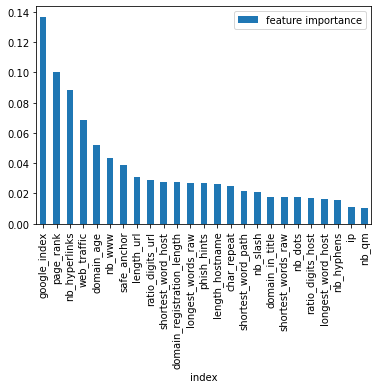

In [ ]:
df_feature_importance[:25].plot.bar(x='index',y='feature importance')

# Blending
In order to achieve high accuracy than this we can train seperate rf classifiers for each type (url, content, external) and take weighted average of all the models.

In [ ]:
model_1_output=forest_classifier.predict(test_data_model_1) # Combined-model output

In [ ]:
forest_classifier_url=RandomForestClassifier(random_state=42,class_weight={0:2,1:1},n_estimators=300,max_depth=40) # url based features
forest_classifier_external=RandomForestClassifier(random_state=42,class_weight={0:2,1:1},n_estimators=300,max_depth=40) # external based features



In [ ]:
train_url['status']=train_url['status'].apply(lambda x: 0 if x=='phishing' else 1).astype('int64')
train_external['status']=train_external['status'].apply(lambda x: 0 if x=='phishing' else 1).astype('int64')

In [ ]:
X_train_set_url = train_url.drop(['status'], axis=1) 
y_train_set_url = train_url['status']


In [ ]:
forest_classifier_url.fit(X_train_set_url,y_train_set_url)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 2, 1: 1},
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
test_data_url=test_data[X_train_set_url.columns]

In [ ]:
model_1_output_url=forest_classifier_url.predict(test_data_url) # url based model output

In [ ]:
X_train_set_external = train_external.drop(['status'], axis=1)
y_train_set_external = train_external['status']

In [ ]:
forest_classifier_external.fit(X_train_set_external,y_train_set_external)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 2, 1: 1},
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
test_data_external=test_data[X_train_set_external.columns]

In [ ]:
model_1_output_external=forest_classifier_external.predict(test_data_external) # external based features output

In [ ]:
model_1_output_content=forest_classifier_content.predict(test_data_content) # content based features model output

# Now we have ouputs predicted by four models
1. url based features
2. Content based features
3. External features
4. Combination of url, Content, External features


We can give more weight to the fourth model and equal weight to the other model to create our final predictions.

In [ ]:
df_models_output=pd.DataFrame()


In [ ]:
df_models_output['url']=model_1_output_url
df_models_output['content']=model_1_output_content
df_models_output['external']=model_1_output_external
df_models_output['combined']=model_1_output

In [ ]:
df_models_output['prediction']=(2*df_models_output['combined']+df_models_output['url']+df_models_output['external']+df_models_output['content'])/5

In [ ]:
df_models_output['prediction']=df_models_output['prediction'].apply(lambda x: 0.0 if x<0.5 else 1.0)

In [ ]:
df_models_output.describe()

,url,content,external,combined,prediction
count,3429.000000,3429.000000,3429.000000,3429.000000,3429.000000
mean,0.497521,0.507437,0.499854,0.501312,0.500437
std,0.500067,0.500018,0.500073,0.500071,0.500073
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
res = pd.DataFrame(df_models_output['prediction'].copy()) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
#res.rename(columns={'final_round':'prediction'},inplace=True)
res['prediction']=res['prediction'].apply(lambda x: 'phishing' if x==0 else 'legitimate')
res.head()

,prediction
0,phishing
1,legitimate
2,phishing
3,phishing
4,legitimate


In [ ]:
res.to_csv('submission_blended_model.csv',index=False)
files.download('submission_blended_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# This model achieves 97.02% accuracy on the test-dataset and have 0.20% higher accuracy than the unblended model.

# Conclusion

Google_index feature contribute high to classifying whether a link is phishing or not. The other top contributors are page_rank, nb_hyperlinks, domain_age.
Another thing to note from here is most of the external features grouped initially contribute to the classification followed by url based features.

Only few content based features contribute to the classification whereas most of them are redundant.

# Grid-search CV

In [ ]:
param_grid = [
    {'bootstrap': [False], 'n_estimators': [200,400,600],'max_features': [2,3,4,5,10],
     'max_depth':[10,20,30,40,50]}
]

forest_classifier = RandomForestClassifier(random_state=42,class_weight={0:2,1:1})
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5,
                          scoring="accuracy",)

grid_search.fit(X_train_set, y_train_set)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 2, 1: 1},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                          

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight={0: 2, 1: 1}, criterion='gini',
                       max_depth=40, max_features=3, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=600, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

# Other thing , just for experimentation, I have tried bayesian optimization, but it didn't help for me rather than GridsearchCV

This is copied from below link
https://kdnuggets.com/2019/07/xgboost-random-forest-bayesian-optimisation.html

# Bayesian optimization

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=9a1311b804c3dbbe99ef48aa3f8265a08a0d71c2cc3a128937d45b9eb6fb40be
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
from sklearn.model_selection import cross_val_score



In [ ]:
def bayesian_optimization(dataset, function, parameters):
   X_train, y_train, X_test, y_test = dataset
   n_iterations = 5
   gp_params = {"alpha": 1e-4}

   BO = BayesianOptimization(function, parameters)
   BO.maximize(n_iter=n_iterations, **gp_params)

   return BO.max

In [ ]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split,max_features):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   max_features=int(max(max_features,3)),
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=X_train_set, 
               y=y_train_set, 
               cv=cv_splits,
               scoring="roc_auc",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10),
                  "max_features":(2,6),
                  }
    
    return function, parameters

In [ ]:
def train(X_train, y_train, X_test, y_test):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 5
    function,parameters=rfc_optimization(cv_splits=cv_splits)
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             max_features=int(max(params["max_features"],3)),
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")

    model.fit(X_train, y_train)
    
    return model

In [ ]:
forest_classifier_hyperopt=train(X_train=X_train_set,y_train=y_train_set,X_test=X_test_set,y_test=y_test_set)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9959   |  133.7    |  2.942    |  8.194    |  825.6    |
|  2        |  0.9953   |  14.81    |  3.736    |  5.689    |  937.4    |
|  3        |  0.9961   |  140.1    |  5.951    |  6.629    |  370.7    |
|  4        |  0.9963   |  54.97    |  4.081    |  6.0      |  871.1    |
|  5        |  0.9964   |  95.49    |  4.972    |  5.639    |  777.2    |
|  6        |  0.9659   |  2.715    |  2.281    |  8.254    |  12.63    |
|  7        |  0.9957   |  149.5    |  4.794    |  9.458    |  996.7    |
|  8        |  0.9971   |  139.6    |  2.213    |  2.177    |  999.4    |
|  9        |  0.9773   |  1.983    |  5.534    |  7.398    |  998.0    |
|  10       |  0.9967   |  149.6    |  3.114    |  4.751    |  999.9    |


In [ ]:
forest_classifier_hyperopt

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=139, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=999,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# This model achieves 96.61% accuracy on the test-set provided